# Multiple Linear Regression

## Learning Outcomes
Learning outcomes can be following but not limited to: 
1. Use Pandas as the primary tool to process structured data in Python with CSV files, 2. Use matplotlib and seaborn library to produce various plots for visualization, 
3. Train a machine learning model and use it to make a prediction from scratch. 


## A. Drive Mounting

In [2]:
#By using the Google Drive file ID, we can import a single file, e.g., csv or txt file, from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B. Necessary Inputs 

In [3]:
#Necessary Inputs
#Importing numpy to use array, lists related operations in an easy-use way
import numpy as np
#Importing statsmodels.api library to perform the linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns 
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd
#Importing linear model from sklearn 
from sklearn import linear_model

## 1. Data Understanding, Cleaning and Transformation
Understand what is data about and why do you think the data was collected, and what research questions data can answers.

(a) You can explain your logic in the text cell of your notebook. 

(b) Based on your research questions Identify Dependent and Independent Variables. 

(c) Use pandas to load your dataset and observe the data. 
If required perform basic data cleaning and Transformation the way you fits your task requirements. 


## 1.1 Data Understanding

This problem involves using regression to analyze the effect of different types of advertising on sales. The parameters of the advertising, such as TV, Radio, Social Media, and Influencer, will be used to predict the sales. Regression can be used to quantify the relationship between the different types of advertising and the sales, and to predict the sales given the different parameters of advertising.


**Data Information**

The data at hand has three features about the spending on advertising, and the target variable is the net sales.

- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- Social Media  - Independent variable quantifying budget for social media ads
- Influencer  - Independent variable quantifying budget for Influencer marketing
- Sales - Dependent variable 

The data was collected in order to understand the effect of advertisement on sales, and to predict the sales given the different parameters of advertising.

Research questions data can answer:
1. What is the effect of advertisement on sales?
2. How much money should be spent on each advertisement channel in order to maximize sales?
3. What is the best combination of advertisement channels to maximize sales?
4. How accurately can sales be predicted given the different parameters of advertising?

In [4]:
#Creating a variable named data and providing path to .csv file for advertising data
data = "/content/drive/MyDrive/AIFinalCoursework/9.csv"

In [5]:
#Reads the data inside data using pandas
ad_data = pd.read_csv(data) 
#Shows or prints the file read for ad_data
ad_data

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866
4568,71,20.610685,6.545573,Nano,249.101915
4569,44,19.800072,5.096192,Micro,163.631457
4570,71,17.534640,1.940873,Macro,253.610411


In [6]:
#Displaying the upper five rows of the dataframe 
ad_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [7]:
# Checking datatype and null count of all features
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 178.7+ KB


In [8]:
#Checks the datatypes of the columns
ad_data.dtypes

TV                int64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [9]:
#Displaying the numbe of rows and column of the dataframe 
print("The data has {} rows and {} columns.".format(ad_data.shape[0], ad_data.shape[1]))

The data has 4572 rows and 5 columns.


In [10]:
#Checking data from the dataset inside Influencer column
ad_data['Influencer'].unique() 

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [11]:
#Creating new column named new_school to store school's data in binary form converting the existing data
ad_data['InfluencerNew'] = ad_data['Influencer'].map({'Mega': 3,'Micro':2, 'Nano':1, 'Macro':0}) 
#Shows the data inside new influencer column
ad_data['InfluencerNew']


0       3
1       3
2       3
3       3
4       2
       ..
4567    2
4568    1
4569    2
4570    0
4571    2
Name: InfluencerNew, Length: 4572, dtype: int64

In [12]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the sum of data inside each column in the array above for ad_data
    print('Sum of',col,'=',ad_data[col].sum())
    print("_____________________")

TV
Sum of TV = 247156
_____________________
Radio
Sum of Radio = 82956.505717683
_____________________
Social Media
Sum of Social Media = 15177.183832886
_____________________
Sales
Sum of Sales = 878802.50521883
_____________________
InfluencerNew
Sum of InfluencerNew = 6919
_____________________


In [13]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the mean of data inside each column in the array above for ad_data
    print('Mean of',col,'=',ad_data[col].mean())
    print("_____________________")

TV
Mean of TV = 54.0586176727909
_____________________
Radio
Mean of Radio = 18.160355892662654
_____________________
Social Media
Mean of Social Media = 3.323956161385458
_____________________
Sales
Mean of Sales = 192.46660210662066
_____________________
InfluencerNew
Mean of InfluencerNew = 1.51334208223972
_____________________


In [14]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the median of data inside each column in the array above for ad_data
    print('Median of',col,'=',ad_data[col].median())
    print("_____________________")

TV
Median of TV = 53.0
_____________________
Radio
Median of Radio = 17.85951293
_____________________
Social Media
Median of Social Media = 3.055565435
_____________________
Sales
Median of Sales = 189.23117235
_____________________
InfluencerNew
Median of InfluencerNew = 2.0
_____________________


In [ ]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the standard deviation of data inside each column in the array above for ad_data
    print('Standard Deviation of',col,'=',ad_data[col].std())
    print("_____________________")

TV
Standard Deviation of TV = 26.101673752225548
_____________________
Radio
Standard Deviation of Radio = 9.676958456095429
_____________________
Social Media
Standard Deviation of Social Media = 2.212670263921655
_____________________
Sales
Standard Deviation of Sales = 93.13309168784247
_____________________
InfluencerNew
Standard Deviation of InfluencerNew = 1.1169020399830338
_____________________


In [ ]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the maximum of data inside each column in the array above for ad_data
    print('Maximum of',col,'=',ad_data[col].max())
    print("_____________________")

TV
Maximum of TV = 100
_____________________
Radio
Maximum of Radio = 48.87116125
_____________________
Social Media
Maximum of Social Media = 13.98166208
_____________________
Sales
Maximum of Sales = 364.0797515
_____________________
InfluencerNew
Maximum of InfluencerNew = 3
_____________________


In [ ]:
#Using for loop in column of ad_data dataset
for col in ad_data:
  #If condition for "TV", "Radio", "Social Media", "InfluencerNew", "Sales" columns
  if col in ["TV", "Radio", "Social Media", "InfluencerNew", "Sales"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the minimum of data inside each column in the array above for ad_data
    print('Minimum of',col,'=',ad_data[col].min())
    print("_____________________")

TV
Minimum of TV = 10
_____________________
Radio
Minimum of Radio = 0.000683948
_____________________
Social Media
Minimum of Social Media = 3.13e-05
_____________________
Sales
Minimum of Sales = 31.19940869
_____________________
InfluencerNew
Minimum of InfluencerNew = 0
_____________________


In [15]:
# Checking statistical measure of all continuous data
ad_data.describe()

,TV,Radio,Social Media,Sales,InfluencerNew
count,4572.000000,4568.000000,4566.000000,4566.000000,4572.000000
mean,54.058618,18.160356,3.323956,192.466602,1.513342
std,26.101674,9.676958,2.212670,93.133092,1.116902
min,10.000000,0.000684,0.000031,31.199409,0.000000
25%,32.000000,10.525957,1.527849,112.322882,1.000000
50%,53.000000,17.859513,3.055565,189.231172,2.000000
75%,77.000000,25.649730,4.807558,272.507922,3.000000
max,100.000000,48.871161,13.981662,364.079751,3.000000


## 1.2. Data Cleaning

In [16]:
#Displaying original dataframe using ad_data variable
print("Original DataFrame:")
display(ad_data)
  
# shift column 'InfluencerNew' to third position
third_column = ad_data.pop('InfluencerNew')
  
# insert column using insert(position,column_name,third_column) function
ad_data.insert(3, 'InfluencerNew', third_column)
#Displaying final data after shifling column dataframe using ad_data variable
print()
print("Final DataFrame")
display(ad_data)

Original DataFrame:


,TV,Radio,Social Media,Influencer,Sales,InfluencerNew
0,16,6.566231,2.907983,Mega,54.732757,3
1,13,9.237765,2.409567,Mega,46.677897,3
2,41,15.886446,2.913410,Mega,150.177829,3
3,83,30.020028,6.922304,Mega,298.246340,3
4,15,8.437408,1.405998,Micro,56.594181,2
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,2
4568,71,20.610685,6.545573,Nano,249.101915,1
4569,44,19.800072,5.096192,Micro,163.631457,2
4570,71,17.534640,1.940873,Macro,253.610411,0



Final DataFrame


,TV,Radio,Social Media,InfluencerNew,Influencer,Sales
0,16,6.566231,2.907983,3,Mega,54.732757
1,13,9.237765,2.409567,3,Mega,46.677897
2,41,15.886446,2.913410,3,Mega,150.177829
3,83,30.020028,6.922304,3,Mega,298.246340
4,15,8.437408,1.405998,2,Micro,56.594181
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,2,Micro,94.685866
4568,71,20.610685,6.545573,1,Nano,249.101915
4569,44,19.800072,5.096192,2,Micro,163.631457
4570,71,17.534640,1.940873,0,Macro,253.610411


Next, we are going to use a secret Python hack known as ‘isnull function’ to discover our data. Actually a common function, 'isnull' helps us find where in our dataset there are missing values. This is useful information as this is what we need to correct while data cleaning.

In [17]:
# Checking Null values
ad_data.isnull()

,TV,Radio,Social Media,InfluencerNew,Influencer,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4567,False,False,False,False,False,False
4568,False,False,False,False,False,False
4569,False,False,False,False,False,False
4570,False,False,False,False,False,False


Our output result is a list of boolean values. 

There are several insights the list can give us. First and foremost is where the missing data is – any ‘True’ reading under a column indicates missing data in that column’s category for that data file. We can further expand the missing data of each feature by using .isnull().sum()

In [18]:
# Checking number of empty values in each column
ad_data.isnull().sum()

TV               0
Radio            4
Social Media     6
InfluencerNew    0
Influencer       0
Sales            6
dtype: int64

I will have to make another decision – whether to drop only the missing values and keep the data in the set, or to eliminate the feature (the entire column) wholesale because there are so many missing datapoints that it isn’t fit for analysis. Or, Inputting values with Pandas or NumBy standards which is also a form of inputting missing data

In [19]:
#remove = ['Radio','Social Media']
#clean_data = ad_data.drop(remove, inplace =True, axis =1)
#clean_data

In [20]:
# replace missing values with the median.
medSales = ad_data['Sales'].median()
print(medSales)
ad_data['Sales'] = ad_data['Sales'].fillna(medSales)

189.23117235


In [21]:
# replace missing values with the median.
medRadio = ad_data['Radio'].median()
print(medRadio)
ad_data['Radio'] = ad_data['Radio'].fillna(medRadio)

17.85951293


In [22]:
# replace missing values with the median.
medSocial = ad_data['Social Media'].median()
print(medSocial)
ad_data['Social Media'] = ad_data['Social Media'].fillna(medSocial)

3.055565435


In [23]:
#Removing the not readable string data as a new data column is introduced
ad_data.drop(['Influencer'], axis=1)

,TV,Radio,Social Media,InfluencerNew,Sales
0,16,6.566231,2.907983,3,54.732757
1,13,9.237765,2.409567,3,46.677897
2,41,15.886446,2.913410,3,150.177829
3,83,30.020028,6.922304,3,298.246340
4,15,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,2,94.685866
4568,71,20.610685,6.545573,1,249.101915
4569,44,19.800072,5.096192,2,163.631457
4570,71,17.534640,1.940873,0,253.610411


In [24]:
# There are no NULL values in the dataset, hence it is clean.
ad_data.isnull().sum()

TV               0
Radio            0
Social Media     0
InfluencerNew    0
Influencer       0
Sales            0
dtype: int64

In [25]:
#Checking duplicated data
ad_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

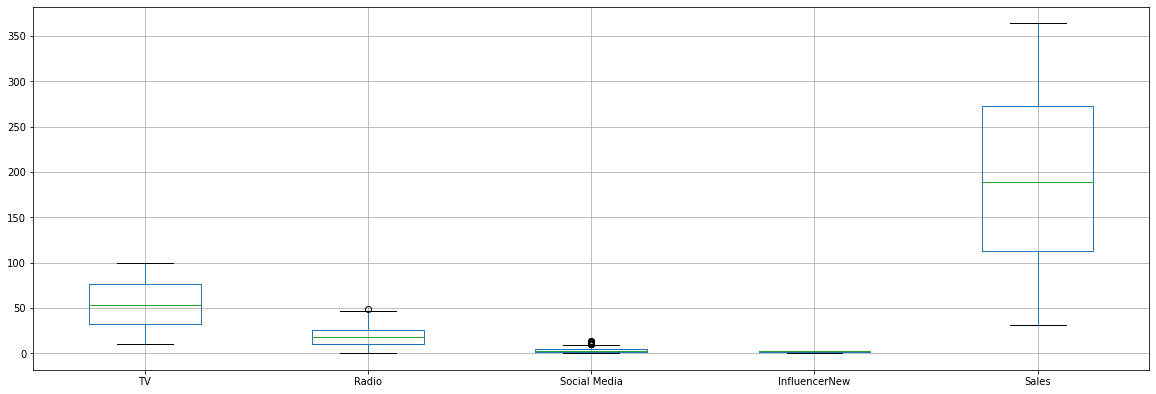

In [26]:
#checking for outliers
ad_data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

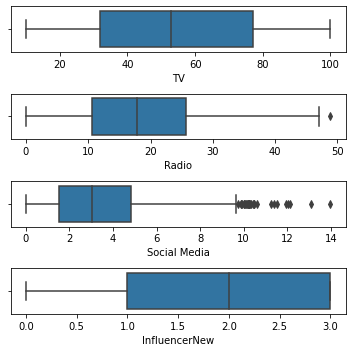

In [27]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(ad_data['TV'], ax = axs[0])
plt2 = sns.boxplot(ad_data['Radio'], ax = axs[1])
plt3 = sns.boxplot(ad_data['Social Media'], ax = axs[2])
plt4 = sns.boxplot(ad_data['InfluencerNew'], ax = axs[3])
plt.tight_layout()

In [28]:
remove = ['Social Media', 'Influencer']
clean_data = ad_data.drop(remove, axis =1)
clean_data

,TV,Radio,InfluencerNew,Sales
0,16,6.566231,3,54.732757
1,13,9.237765,3,46.677897
2,41,15.886446,3,150.177829
3,83,30.020028,3,298.246340
4,15,8.437408,2,56.594181
...,...,...,...,...
4567,26,4.472360,2,94.685866
4568,71,20.610685,1,249.101915
4569,44,19.800072,2,163.631457
4570,71,17.534640,0,253.610411


## 1.3. Identify Dependent and Independent Variables

The dependent variable in a machine learning problem is the target that we are attempting to predict, and the independent variables are the features or inputs used to make the prediction.

In [29]:
#Displaying the correlation between the dataset
clean_data.corr()

,TV,Radio,InfluencerNew,Sales
TV,1.000000,0.866421,-0.019913,0.996085
Radio,0.866421,1.000000,-0.005973,0.867371
InfluencerNew,-0.019913,-0.005973,1.000000,-0.018138
Sales,0.996085,0.867371,-0.018138,1.000000


First I need to assign the independent variable (feature variable), TV, in this case, to the variable X and the response variable which is the dependent variable, Sales, to the variable y.

In [29]:
#Independent Variable 
#X = clean_data['TV']
#y = ad_data['Sales']

In [30]:
#Independent Variable 
X = clean_data.iloc[:, :-2]
X

,TV,Radio
0,16,6.566231
1,13,9.237765
2,41,15.886446
3,83,30.020028
4,15,8.437408
...,...,...
4567,26,4.472360
4568,71,20.610685
4569,44,19.800072
4570,71,17.534640


In [31]:
#Dependent variable
y = clean_data['Sales']
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

## 2. Data Analysis and Visualization
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset. To generate better insights from the data make visualization and plot of your Independent variable against Dependent variable. 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


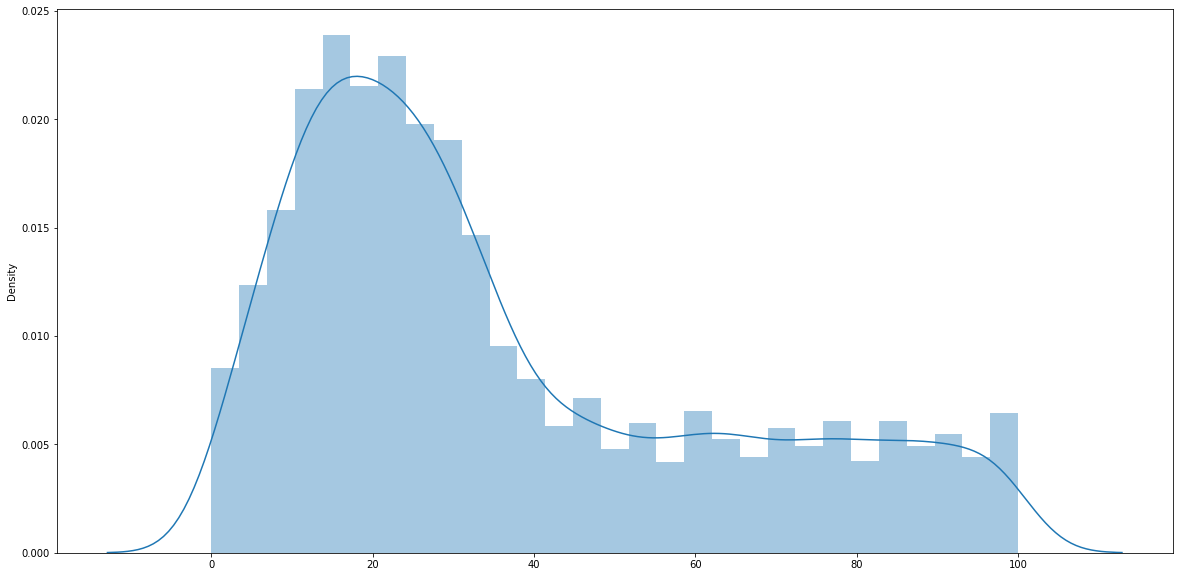

In [42]:
#Visualizing Independent Data
sns.distplot(X)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


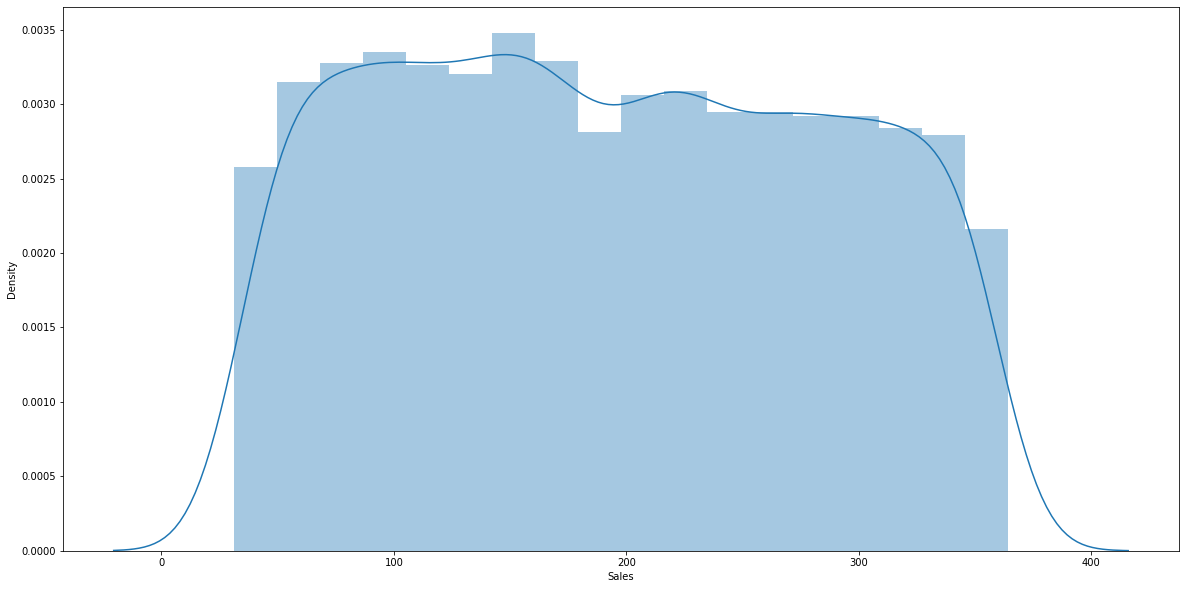

In [43]:
#Visualizing dependent Data
sns.distplot(y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


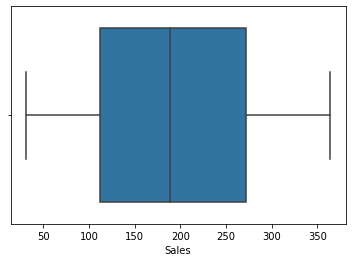

In [33]:
sns.boxplot(ad_data['Sales'])
plt.show()

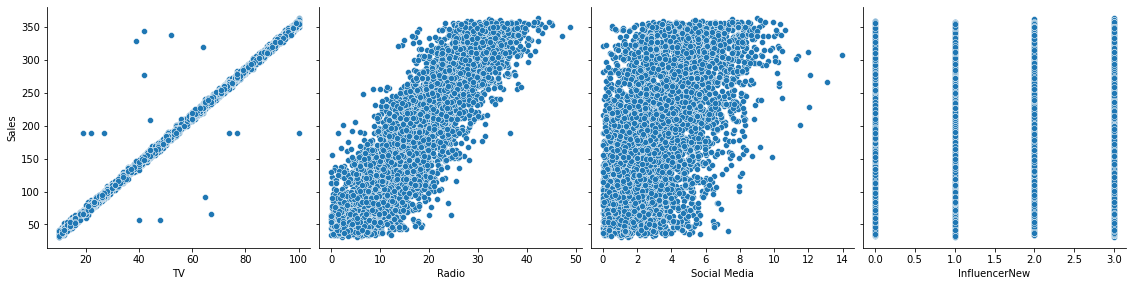

In [34]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(ad_data, x_vars=['TV', 'Radio', 'Social Media', 'InfluencerNew'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

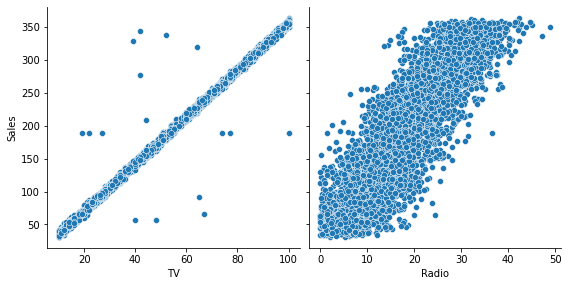

In [44]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(clean_data, x_vars=['TV', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

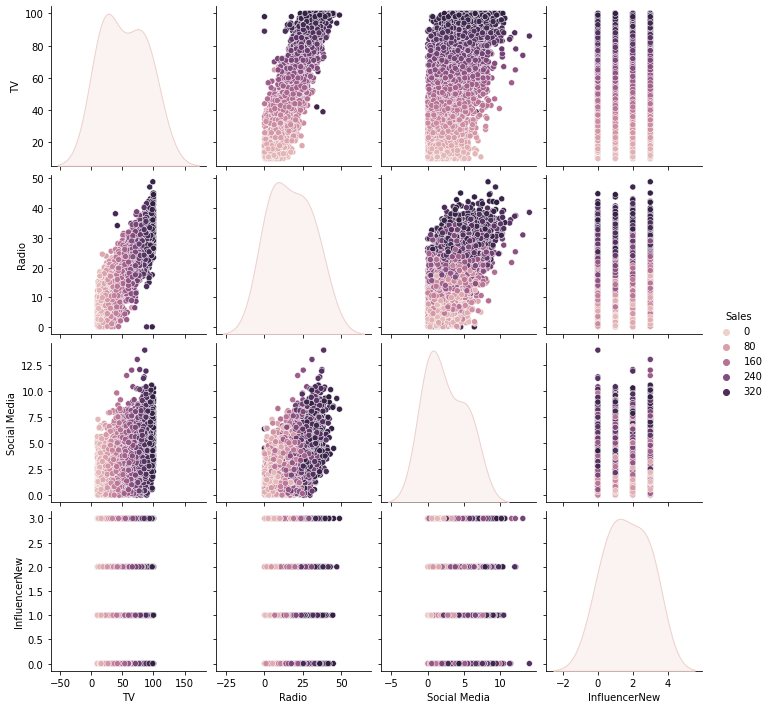

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
sns.pairplot(ad_data,hue='Sales')

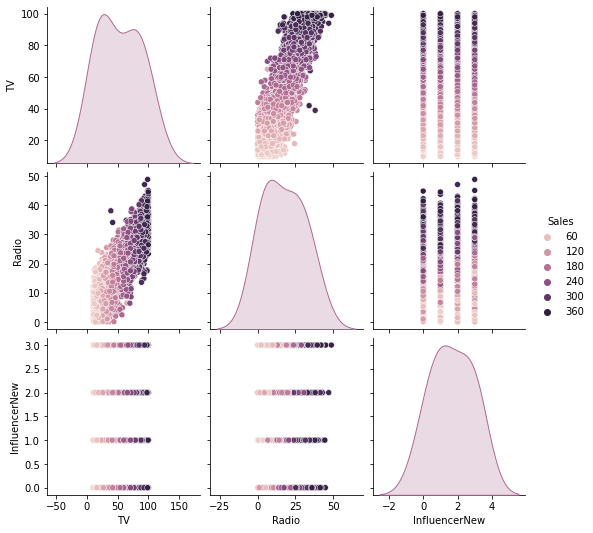

In [35]:
plt.rcParams["figure.figsize"] = (20,10)
sns.pairplot(clean_data,hue='Sales')

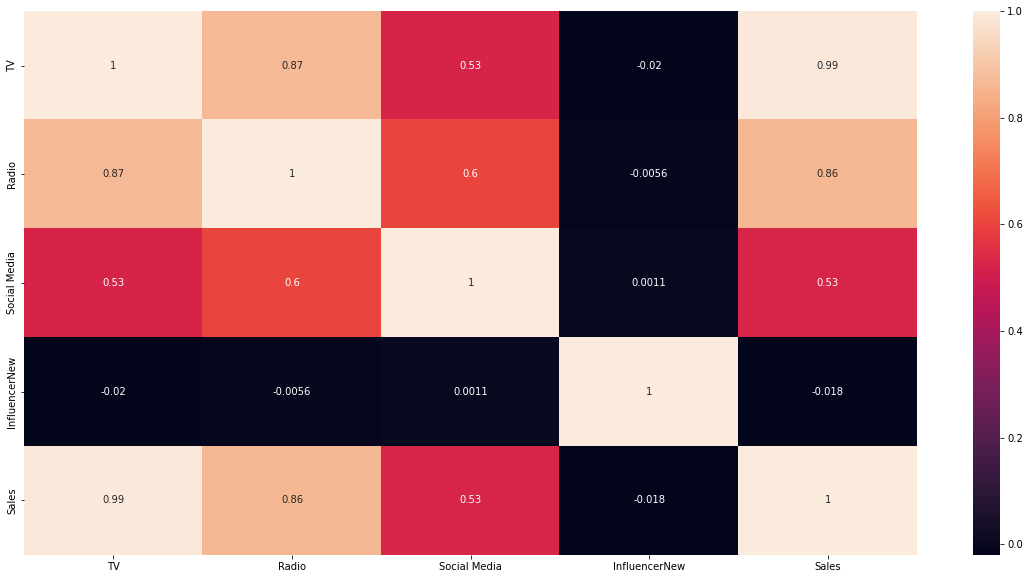

In [ ]:
#  Correlation for train set
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(ad_data[['TV','Radio','Social Media', 'InfluencerNew', 'Sales']].corr(), annot=True)
plt.show()

The heatmap displays the correlations between each pair of variables as color-coded cells, where darker colors indicate stronger correlations. This is a useful way to visualize the relationships between the variables and to identify any highly correlated pairs of variables.

In [33]:
TV = ad_data['TV'].to_numpy()
Radio = ad_data['Radio'].to_numpy()
Sales = ad_data['Sales'].to_numpy()


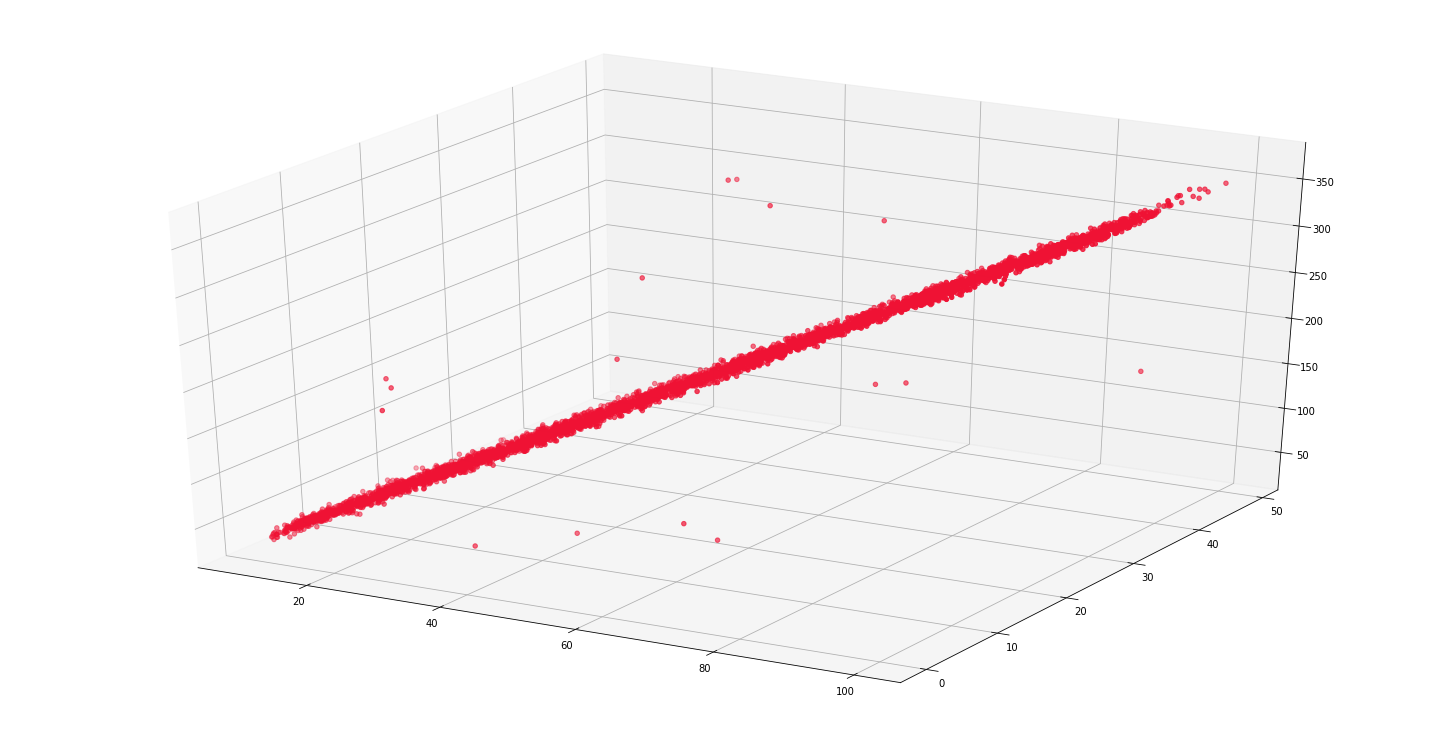

In [46]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(TV, Radio, Sales, color='#ef1234')
plt.show()

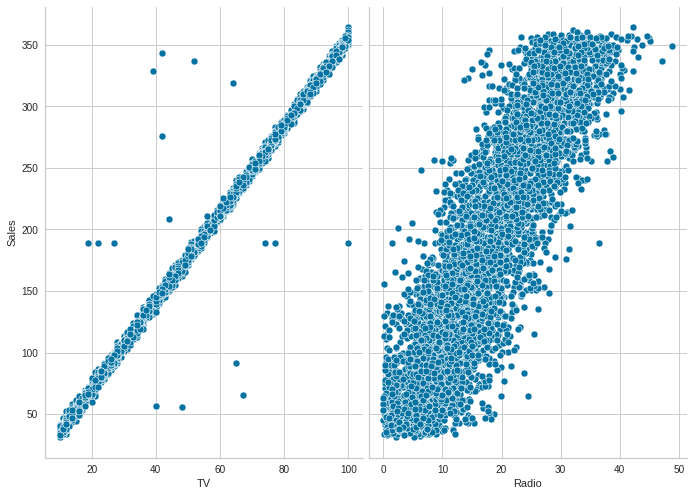

In [80]:
sns.pairplot(ad_data, x_vars=['TV','Radio'], y_vars='Sales', height=7, aspect=0.7);

## 3. Build Primary Model[Multiple Linear Regression]
Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from Scratch. 


## From Scratch

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

The x0 array is used as the intercept in the regression model, with each row corresponding to a sample and each column corresponding to a feature. The W array provides the initial values for the regression model's coefficients, and the Y2 array is the target or dependent variable.

In [34]:
# initializing Matrices which act as an Container to hold our Data.
x0 = np.ones(len(TV))
X2 = np.array([TV, Radio]).T
W = np.array([0, 0])
Y2 = np.array(Sales)


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x 
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [35]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix or independent variable
      Y: Target Matrix or dependent variable
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of data in your datasets
   
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

The cost function measures the difference between the predicted values and the actual values, given the inputs and the parameters W. The purpose of this cost function is to evaluate the performance of a machine learning model and to guide the optimization process towards finding the best parameters that minimize the cost.

In [36]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

22851.132480826433


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data). 
One of the most suitable methods to do the same is Gradient Descent Algorithm



Implement GDA from Scratch.

Function to estimate: 
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





The code implements the gradient descent algorithm in Python to optimize the coefficients A of a linear regression model. The input parameters include the features X, target variable Y, initial coefficients A, learning rate beta, and number of iterations. The function returns the optimized coefficients W_update and a history of cost values over all iterations. The algorithm updates the coefficients by computing the hypothesis values, loss, gradient of the cost function, and new cost value in each iteration. The process repeats until convergence, returning the optimized coefficients and history of cost values.

In [37]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost
        
    return W_update, cost_history


Here, the gradient descent algorithm runs for 100,000 iterations with a learning rate (alpha) of 0.0001. It calls the gradient descent function with the inputs X2, Y2, the initial weights W, the learning rate beta, and the number of iterations. The function returns the updated weights and a history of cost values over all iterations. The final updated weights are printed, and the final cost of the iterations is also printed, which is the last value in the history_cost array. This value represents the final cost after the algorithm has converged, providing an insight into how well the model is fitting the data.

In [38]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print("New Value")
print(new_weights)

# Final Cost of our Iterations.
print("Final Cost of iteration",cost_history[-1])

New Value
[1.28235451 0.4275823 ]
Final Cost of iteration 8238.276051554398


## From Sklearn
Estimating Coefficients

In [42]:
from sklearn.linear_model import LinearRegression

# create X and y
independent = ['TV', 'Radio']
X1 = ad_data[independent]
y1 = ad_data.Sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X1, y1)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

0.32290656190986056
[3.49798803 0.16756808]


In [44]:
# pair the feature names with the coefficients
list(zip(independent, lm1.coef_))

[('TV', 3.497988034147046), ('Radio', 0.16756807711475458)]

In [45]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X1[['TV']], y)
lm2_preds = lm2.predict(X1[['TV']])

print("R^2: ", r2_score(y1, lm2_preds))

R^2:  0.9921859338211833


In [46]:
lm3 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm3_preds = lm3.predict(X[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.992261545754586


In [54]:
# Train-Test Split
#Now I need to split the variable into training and testing sets. To perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
# Let's now take a look at the train dataset
#X_train.head()

,TV,Radio
594,63,14.586612
538,26,1.218354
576,89,36.060872
1292,11,0.491153
150,84,33.955619


In [56]:
#y_train.head()

594     226.019273
538      90.054222
576     316.582362
1292     34.933002
150     299.346604
Name: Sales, dtype: float64

In [57]:
# Add a constant to get an intercept
#X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
#lr = sm.OLS(y_train, X_train_sm).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
#lr.params

const    0.444063
TV       3.471696
Radio    0.239695
dtype: float64

In [59]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
#print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.661e+05
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:20:02   Log-Likelihood:                -11624.
No. Observations:                3200   AIC:                         2.325e+04
Df Residuals:                    3197   BIC:                         2.327e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4441      0.371      1.198      0.2

## 4. Model Evaluation
Pick an appropriate evaluation metric to evaluate your model on the test set. 


## From Scratch

In [39]:
# Model Evaluation - RMSE
#Defining rmse (root mean squared error) function calculates the root mean squared error between the actual target variables Y and the predicted target variables Y_pred.
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  #Calculating the Root Mean Squared Error (RMSE) 
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2
# Defining r2 (R-squared error) function to calculate the coefficient of determinatio which is a measure of how well the model fits the data.
def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.  
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  #The variable "ss_tot" is the total sum of squares of the difference between Y and the mean of Y.
  ss_tot = sum((Y - mean_y) ** 2)
  #The variable "ss_res" is the residual sum of squares, which is the sum of squares of the difference between Y and the predicted target variable Y_pred.
  ss_res = sum((Y - Y_pred) ** 2)
  #R-squared error of a linear regression model
  r2 =   (ss_res / ss_tot) - 1
  return r2
  

## Check Model Performance

The two functions for evaluating a regression model are "rmse" and "r2". "rmse" calculates the Root Mean Square Error, which is the difference between the actual values of the target variable and the predicted values. "r2" calculates the R Squared Error, which is a measure of how well the model fits the data. This value ranges from 0 to 1, with 1 being a perfect fit.

In [40]:
#To evaluate the performance of the model that was trained using the gradient descent algorithm
Y_pred = X2.dot(new_weights)
#The rmse and r2 functions are then called with Y2 and Y_pred as inputs.
print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

128.36102252283922
0.9024929121522136


The appropriate evaluation metric for a multiple linear regression model depends on the specific problem and the goals of the analysis. In this case, since we are trying to predict the pH value of a wine, a common evaluation metric for regression problems is the Mean Squared Error (MSE). MSE measures the average squared difference between the predicted values and the true values. Lower values of MSE indicate that the model is making more accurate predictions.

## From Sklearn

In [60]:
#y_train_pred = lr.predict(X_train_sm)
#res = (y_train - y_train_pred)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


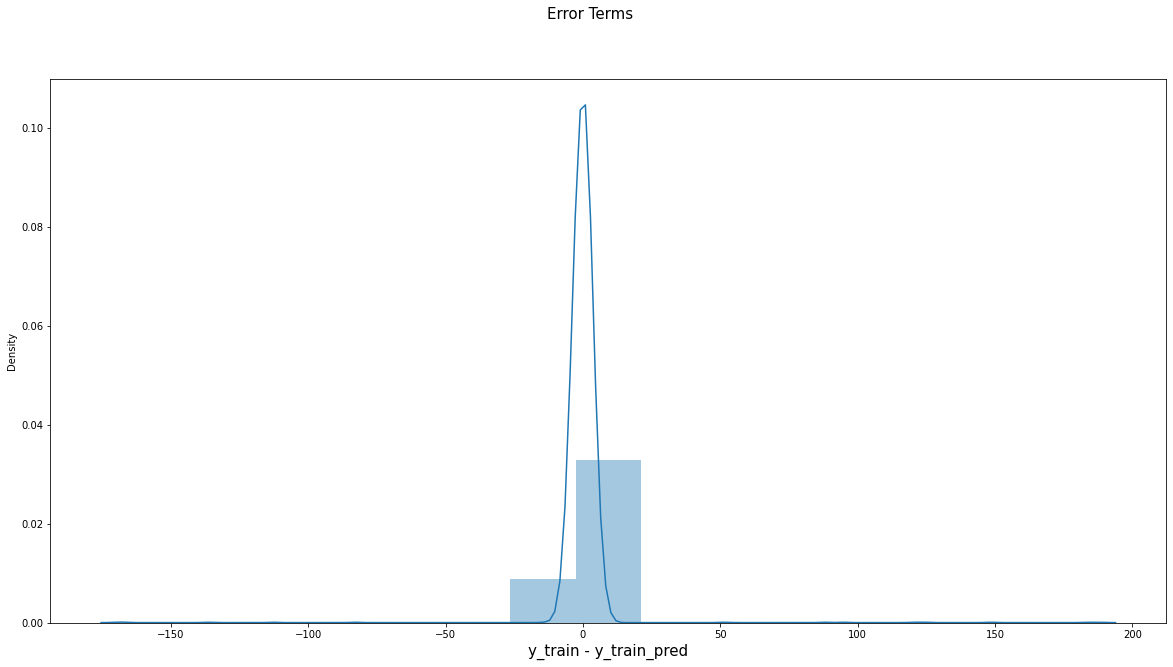

In [61]:
#fig = plt.figure()
#sns.distplot(res, bins = 15)
#fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
#plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
#plt.show()

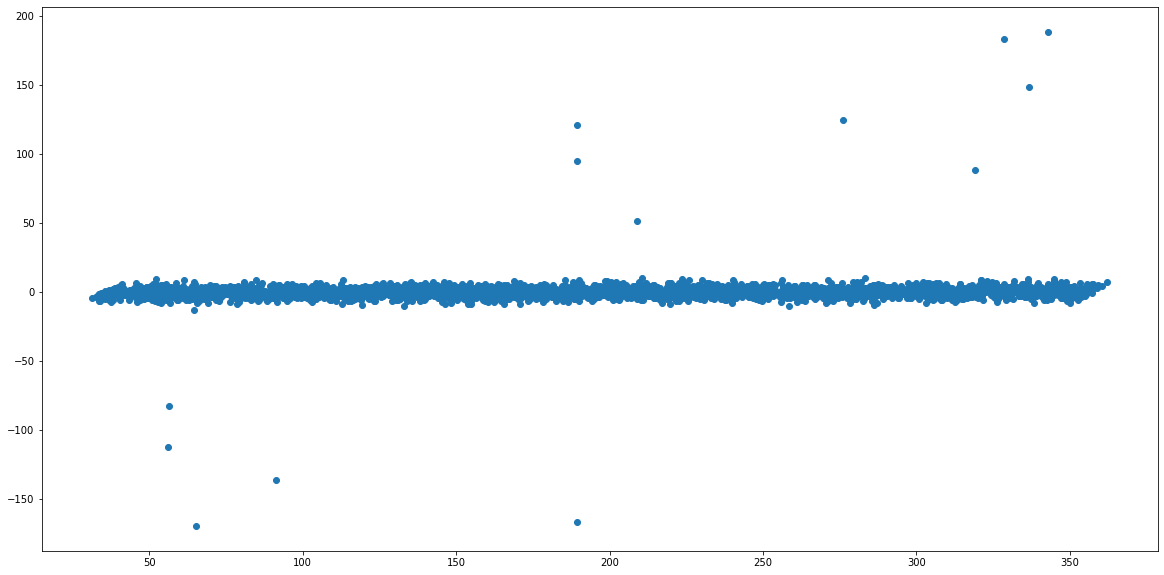

In [62]:
#Looking for patterns in the residuals
#plt.scatter(y_train,res)
#plt.show()

### Model Evaluation Using Train/Test Split and Metrics
Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [86]:
#Importing the train_test_split function from the scikit-learn library's model_selection module. This function is used to split the input data into training and testing sets. 
from sklearn.model_selection import train_test_split
#Importing mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error
#Defining the variables
X1 = ad_data[['TV']]
y1 = ad_data.Sales
#The input parameters for the function are X (the features), y (the target variable), train_size (the proportion of the data to be used for training), test_size (the proportion of the data to be used for testing), and random_state (the random seed for generating a random number).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
#Defining  the linear regression
lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)
#Displaying RMSE and R^2 
print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 8.640526402422443
R^2:  0.9914188678710173


In [87]:
#Defining the variables
X1 = ad_data[['TV', 'Radio']]
y1 = ad_data.Sales
#The input parameters for the function are X (the features), y (the target variable), train_size (the proportion of the data to be used for training), test_size (the proportion of the data to be used for testing), and random_state (the random seed for generating a random number).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
#Defining  the linear regression
lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)
#Displaying RMSE and R^2 
print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 8.640526402422443
R^2:  0.9914188678710173


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


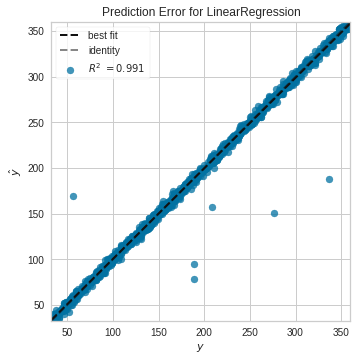

In [49]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof() 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


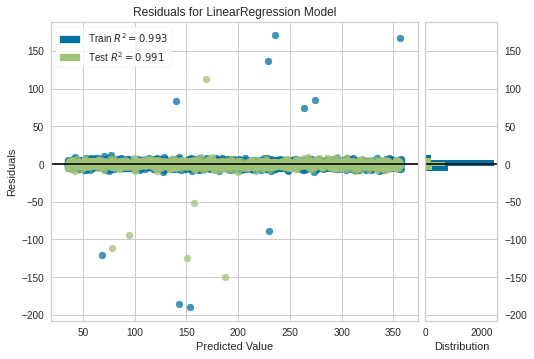

In [141]:
# Fit the training data to the visualizer
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

## 5. Dimensionality Reduction
Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced features,evaluate the model and Compare the output with the evaluation from step 4. 


Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining as much information as possible. To apply PCA and rebuild the multiple linear regression model with reduced features:

In [163]:
#Displaying the dataframe
print("DataFrame:")
display(clean_data)

DataFrame:


,TV,Radio,InfluencerNew,Sales
0,16,6.566231,3,54.732757
1,13,9.237765,3,46.677897
2,41,15.886446,3,150.177829
3,83,30.020028,3,298.246340
4,15,8.437408,2,56.594181
...,...,...,...,...
4567,26,4.472360,2,94.685866
4568,71,20.610685,1,249.101915
4569,44,19.800072,2,163.631457
4570,71,17.534640,0,253.610411


Here,The PCA transformation is applied to the training data and the test data to reduce their dimensionality to 2 components. The linear regression model is then fit on both the PCA transformed training data and the original training data.The performance of the models is evaluated by calculating the mean squared error (MSE) between the true target values and the predicted target values for the test data. The MSE of the model fit on the original data and the MSE of the model fit on the PCA transformed data are compared, and it is determined which model performed better based on which had a lower MSE.

In [93]:
#Importing PCA from the "sklearn.metrics" library.
from sklearn.decomposition import PCA

#Performing a principal component analysis (PCA) on the input data and then comparing the performance of a linear regression model fit on both the original data and the PCA transformed data.
#Create an instance of PCA with two components
pca = PCA(n_components= 2)
#Fit the PCA model to the training data
X_train_pca = pca.fit_transform(X_train)
#Transform the test data using the fitted PCA model
X_test_pca = pca.transform(X_test)
#Create a linear regression model
regressor_pca = LinearRegression()
#Fit the linear regression model to the transformed training data
regressor_pca.fit(X_train_pca, y_train)
#Predict the output of the transformed test data
y_pred_pca = regressor_pca.predict(X_test_pca)

# Evaluate the model using the mean squared error metric
mse_pca = rmse(y_test, y_pred_pca)
print("Mean Squared Error (PCA):", mse_pca)


Mean Squared Error (PCA): 8.64052640242244


## 6. Conclusion
Conclude the result of the comparison.


In [90]:
##Calculate the root mean squared error (RMSE) between the test data and the predictions from the multiple regression model
rmse_mlr = np.sqrt(mean_squared_error(y_test, lm5_preds))
print("RMSE from Multiple Regression: ",rmse_mlr)

RMSE from Multiple Regression:  8.640526402422443


In [94]:
# Compare the evaluation from step 4
if rmse_mlr < mse_pca:
    print("The model without PCA performed better.")
if rmse_mlr > mse_pca:
    print("The model with PCA performed better.")
else:
  print("The model both with PCA and Multiple Regression performed better.")


The model with PCA performed better.


In [96]:
#Evaluating on the test data
r2_pca = r2_score(y_test, y_pred_pca)

#comparing the performance of two linear regression models from step 4
if r2_score(y_test, lm5_preds) < r2_pca:
    print("The model without PCA performed better.")
if r2_score(y_test, lm5_preds) > r2_pca:
    print("The model with PCA performed better.")
else:
  print("The model both with PCA and Multiple Regression performed better.")

The model both with PCA and Multiple Regression performed better.


Based on the results of the linear regression models with and without PCA, it seems that both model performs better. This indicates that the model with PCA and Multiple Linear Regression is able to better explain the variance in the target variable. It is important to note that the R2 value alone does not provide a complete picture of the performance of the model, but it is a commonly used metric for evaluating the performance of regression models. 

In [53]:
#Returns the shape (dimensions) of the array X and printing the result as  tuple with two values, representing the number of rows and columns in X, respectively. 
X.shape


(4572, 2)

In [54]:
#Returning '.shape' attribute as a tuple with the number of rows as the first value and the number of columns as the second value.
X_train.shape

(3429, 2)

In [55]:
#Returning the shape of the training data after it has been transformed into principal components using the PCA method
X_train_pca.shape

(3429, 2)

In [56]:
#Retrieving the shape of numpy array
X_test_pca.shape

(1143, 2)

In conclusion, regression is a statistical technique used to analyze the relationship between two or more variables. In this case, it is being used to analyze the effect of different types of advertising on sales. Multiple linear regression is a type of regression that uses multiple independent variables to predict a dependent variable, in this case sales. By using this technique, businesses can better understand the relationship between the different types of advertising and the sales, and use this information to predict sales and allocate their advertising budget accordingly.